In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.random_projection import GaussianRandomProjection

In [8]:
data = pd.read_csv("StudentPerformanceFactors_Encoded.csv")
cols = ['Sleep_Hours', 'Motivation_Level', 'Family_Income', 'School_Type', 'Gender']
data = data.drop(columns=cols, axis = 1)
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [9]:
def eval(x, y,  model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    start_time = time.time()
    model.fit(x_train, y_train)
    full_time = time.time() - start_time
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    metrics = {
        "Time" : full_time,
        "MSE" : mse,
        "MAE" : mae,
        "RMSE" : rmse,
        "R2" : r2
    }
    
    return metrics
    

(4812, 14)

In [10]:
transformer = GaussianRandomProjection(n_components=5)
X_projected = transformer.fit_transform(x)

In [11]:
model = LinearRegression()
m = eval(X_projected, y, model)

In [12]:
m

{'Time': 0.0020427703857421875,
 'MSE': 3.432120147737267,
 'MAE': 1.474749146373346,
 'RMSE': 1.852598215409177,
 'R2': 0.6850912553499224}

In [14]:
model = DecisionTreeRegressor(random_state=42)
m = eval(X_projected, y, model)

In [15]:
m

{'Time': 0.04535984992980957,
 'MSE': 6.9966749792186205,
 'MAE': 2.0623441396508726,
 'RMSE': 2.645122866563786,
 'R2': 0.3580311761862568}

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
m = eval(X_projected, y, model)

In [17]:
m

{'Time': 2.5529656410217285,
 'MSE': 3.6595880299251866,
 'MAE': 1.5230091438071487,
 'RMSE': 1.9130049738370223,
 'R2': 0.6642203003295293}

In [18]:
model = SVR(kernel='rbf')
m = eval(X_projected, y, model)

In [19]:
m

{'Time': 1.0372450351715088,
 'MSE': 3.3324082518795173,
 'MAE': 1.4569643615162926,
 'RMSE': 1.8254884967809348,
 'R2': 0.6942401623227581}

In [20]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
m = eval(X_projected, y, model)

In [21]:
m

{'Time': 0.20976614952087402,
 'MSE': 3.8469805249834783,
 'MAE': 1.5645122131702807,
 'RMSE': 1.9613721026321034,
 'R2': 0.6470263989404541}

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator

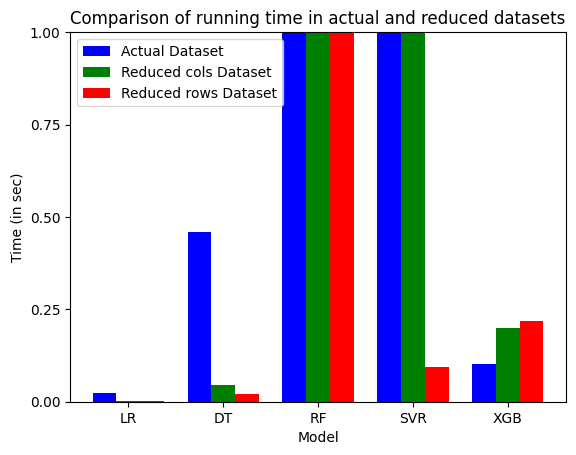

In [44]:
list1 = [0.023, 0.46, 1.68, 1.04, 0.103]
list2 = [0.0020, 0.04535, 2.55, 1.03, 0.20]
list3 = [0.00314, 0.022, 1.583, 0.0952, 0.218]

# X-axis positions (indices for bars)
x = np.arange(len(list1))  # [0, 1, 2, 3, 4]

# Bar width
width = 0.25  # Width of each bar

# Plotting the bar chart
plt.bar(x - width, list1, width, label='Actual Dataset', color='b')
plt.bar(x, list2, width, label='Reduced cols Dataset', color='g')
plt.bar(x + width, list3, width, label='Reduced rows Dataset', color='r')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Time (in sec)')
plt.title('Comparison of running time in actual and reduced datasets')

plt.xticks(x, ['LR', 'DT', 'RF', 'SVR', 'XGB'])
# Customize y-axis to have ticks with a step of 0.25
plt.gca().yaxis.set_major_locator(MultipleLocator(0.25))  # Set the tick interval to 0.25
plt.ylim(0, 1) 
# Adding legend
plt.legend()

# Display the plot
plt.show()

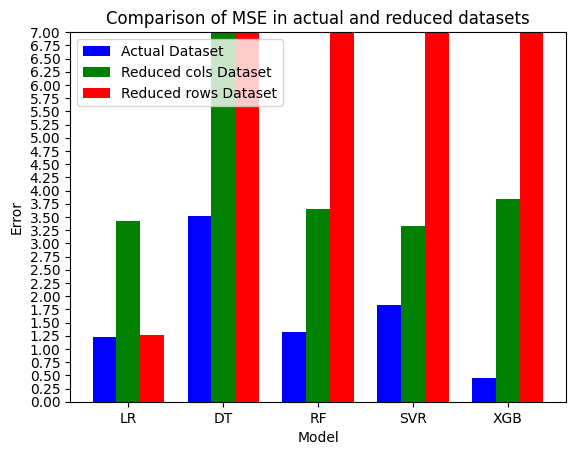

In [42]:
list1 = [1.22057, 3.517, 1.32, 1.84, 0.45]
list2 = [3.432, 6.99667, 3.659, 3.33, 3.84]
list3 = [1.269, 999 , 400, 24, 200]

# X-axis positions (indices for bars)
x = np.arange(len(list1))  # [0, 1, 2, 3, 4]

# Bar width
width = 0.25  # Width of each bar

# Plotting the bar chart
plt.bar(x - width, list1, width, label='Actual Dataset', color='b')
plt.bar(x, list2, width, label='Reduced cols Dataset', color='g')
plt.bar(x + width, list3, width, label='Reduced rows Dataset', color='r')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Comparison of MSE in actual and reduced datasets')

plt.xticks(x, ['LR', 'DT', 'RF', 'SVR', 'XGB'])
# Customize y-axis to have ticks with a step of 0.25
plt.gca().yaxis.set_major_locator(MultipleLocator(0.25))  # Set the tick interval to 0.25
plt.ylim(0, 7) 
# Adding legend
plt.legend()

# Display the plot
plt.show()